# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [3]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [4]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:",'\n',xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n') #calling as a method: dangerous
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: 
 a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [5]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n up to three')
print (xs[7:], '\n from seventh')
print (xs[::3], '\n step of three')
print (xs[xs>3], '\n grater than three')
print (np.exp(xs), '\n exp')
print (np.mean(xs), np.std(xs), '\n mean and devstd')

a    0.0
b    0.5
c    1.0
dtype: float64 
 up to three
h    3.5
i    4.0
j    4.5
dtype: float64 
 from seventh
a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 
 step of three
h    3.5
i    4.0
j    4.5
dtype: float64 
 grater than three
a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 
 exp
2.25 1.4361406616345072 
 mean and devstd


In [6]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d) #ok.. series == dictionary in pracice...

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [7]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s) #we get NaN!! ocho..

a   -0.175747
b   -1.194991
c   -0.928330
d    2.193868
e   -1.281963
dtype: float64
a         NaN
b   -2.389982
c   -1.856659
d    4.387736
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [8]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-10
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [9]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
print(ts.value) #actual timestamp
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [10]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-09-13'], '\n') # Note - includes end time


2020-09-11 14:45:00    10.101886
2020-09-12 14:45:00     8.746741
2020-09-13 14:45:00    11.411759
2020-09-14 14:45:00    10.645405
Freq: D, dtype: float64 

2020-09-11 14:45:00    10.101886
2020-09-12 14:45:00     8.746741
2020-09-13 14:45:00    11.411759
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [11]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [12]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2020-11-09 14:45:00,1.407144,0.219429,-0.207785,2.269153
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,1.370118
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,0.832952
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,-0.224717
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,0.335671
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,-0.120855
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,-0.539501
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,-0.576592
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,-0.355268
2020-11-09 23:45:00,0.908403,1.097730,1.756739,-0.064603


or by means of a dictionary:


In [13]:
df2 = pd.DataFrame(
    { 'A' : 1., #if just one element, it's going to be repeated over and over..
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11), #pay attention to array lenghts and indexes!
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [14]:
df.head() #just first records

,A,B,C,D
2020-11-09 14:45:00,1.407144,0.219429,-0.207785,2.269153
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,1.370118
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,0.832952
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,-0.224717
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,0.335671


In [15]:
df.tail(4) #last records

,A,B,C,D
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,-0.539501
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,-0.576592
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,-0.355268
2020-11-09 23:45:00,0.908403,1.097730,1.756739,-0.064603


In [16]:
df.index  

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values #it's a numpy array!!!

array([[ 1.4071442 ,  0.21942858, -0.20778537,  2.26915337],
       [ 0.04319898, -0.45611497, -1.21283642,  1.37011796],
       [-0.88977804,  1.36372401, -2.28725698,  0.83295239],
       [ 0.02795393, -0.19103222,  1.75541842, -0.22471662],
       [-1.42703507, -1.41128815,  0.53530121,  0.33567144],
       [ 0.50536337, -0.69682221, -0.9887453 , -0.12085475],
       [ 0.41531491, -1.72488533, -0.49660051, -0.5395011 ],
       [-0.42691352, -1.04278307, -1.09615073, -0.57659207],
       [-1.46627265,  0.20584893,  0.37437785, -0.35526842],
       [ 0.90840251,  1.09773034,  1.75673877, -0.06460314]])

In [19]:
df.describe() #nice!

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.090262,-0.263619,-0.186754,0.292636
std,0.961171,1.013508,1.308817,0.930676
min,-1.466273,-1.724885,-2.287257,-0.576592
25%,-0.774062,-0.956293,-1.069299,-0.322630
50%,0.035576,-0.323574,-0.352193,-0.092729
75%,0.482851,0.216034,0.495070,0.708632
max,1.407144,1.363724,1.756739,2.269153


In [20]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,1.407144,0.043199,-0.889778,0.027954,-1.427035,0.505363,0.415315,-0.426914,-1.466273,0.908403
B,0.219429,-0.456115,1.363724,-0.191032,-1.411288,-0.696822,-1.724885,-1.042783,0.205849,1.097730
C,-0.207785,-1.212836,-2.287257,1.755418,0.535301,-0.988745,-0.496601,-1.096151,0.374378,1.756739
D,2.269153,1.370118,0.832952,-0.224717,0.335671,-0.120855,-0.539501,-0.576592,-0.355268,-0.064603


In [21]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,2.269153,-0.207785,0.219429,1.407144
2020-11-09 15:45:00,1.370118,-1.212836,-0.456115,0.043199
2020-11-09 16:45:00,0.832952,-2.287257,1.363724,-0.889778
2020-11-09 17:45:00,-0.224717,1.755418,-0.191032,0.027954
2020-11-09 18:45:00,0.335671,0.535301,-1.411288,-1.427035
2020-11-09 19:45:00,-0.120855,-0.988745,-0.696822,0.505363
2020-11-09 20:45:00,-0.539501,-0.496601,-1.724885,0.415315
2020-11-09 21:45:00,-0.576592,-1.096151,-1.042783,-0.426914
2020-11-09 22:45:00,-0.355268,0.374378,0.205849,-1.466273
2020-11-09 23:45:00,-0.064603,1.756739,1.097730,0.908403


In [22]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,0.832952
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,1.370118
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,-0.576592
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,-0.120855
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,-0.539501
2020-11-09 14:45:00,1.407144,0.219429,-0.207785,2.269153
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,-0.355268
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,0.335671
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,-0.224717
2020-11-09 23:45:00,0.908403,1.097730,1.756739,-0.064603


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [23]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)


2020-11-09 14:45:00    1.407144
2020-11-09 15:45:00    0.043199
2020-11-09 16:45:00   -0.889778
2020-11-09 17:45:00    0.027954
2020-11-09 18:45:00   -1.427035
2020-11-09 19:45:00    0.505363
2020-11-09 20:45:00    0.415315
2020-11-09 21:45:00   -0.426914
2020-11-09 22:45:00   -1.466273
2020-11-09 23:45:00    0.908403
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00    1.407144
2020-11-09 15:45:00    0.043199
2020-11-09 16:45:00   -0.889778
2020-11-09 17:45:00    0.027954
2020-11-09 18:45:00   -1.427035
2020-11-09 19:45:00    0.505363
2020-11-09 20:45:00    0.415315
2020-11-09 21:45:00   -0.426914
2020-11-09 22:45:00   -1.466273
2020-11-09 23:45:00    0.908403
Freq: H, Name: A, dtype: float64


In [24]:
# selecting rows by counting
print (df[0:3], '\n')

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00  1.407144  0.219429 -0.207785  2.269153
2020-11-09 15:45:00  0.043199 -0.456115 -1.212836  1.370118
2020-11-09 16:45:00 -0.889778  1.363724 -2.287257  0.832952 

                            A         B         C         D
2020-11-09 14:45:00  1.407144  0.219429 -0.207785  2.269153
2020-11-09 15:45:00  0.043199 -0.456115 -1.212836  1.370118
2020-11-09 16:45:00 -0.889778  1.363724 -2.287257  0.832952


### Selection by label

In [25]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.407144
B    0.219429
C   -0.207785
D    2.269153
Name: 2020-11-09 14:45:00, dtype: float64

In [26]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
# a=df.loc[:,['A', 'B']] it returns a COPY! If you change a, then 
# df, the original database, is NOT changed!

,A,B
2020-11-09 14:45:00,1.407144,0.219429
2020-11-09 15:45:00,0.043199,-0.456115
2020-11-09 16:45:00,-0.889778,1.363724
2020-11-09 17:45:00,0.027954,-0.191032
2020-11-09 18:45:00,-1.427035,-1.411288
2020-11-09 19:45:00,0.505363,-0.696822
2020-11-09 20:45:00,0.415315,-1.724885
2020-11-09 21:45:00,-0.426914,-1.042783
2020-11-09 22:45:00,-1.466273,0.205849
2020-11-09 23:45:00,0.908403,1.097730


In [27]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,-1.427035,-1.411288
2020-11-09 19:45:00,0.505363,-0.696822
2020-11-09 20:45:00,0.415315,-1.724885


In [28]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.04319898321533293
0.04319898321533293


### Selecting by position

**ILOC RETURNS VIEWS** , different from LOC:

**LOC RETURNS COPIES**

In [29]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.027954
B   -0.191032
C    1.755418
D   -0.224717
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  0.027954 -0.191032
2020-11-09 18:45:00 -1.427035 -1.411288


In [30]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]] #just counting across rows

,A,C
2020-11-09 15:45:00,0.043199,-1.212836
2020-11-09 16:45:00,-0.889778,-2.287257
2020-11-09 18:45:00,-1.427035,0.535301


In [31]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  0.043199 -0.456115 -1.212836  1.370118
2020-11-09 16:45:00 -0.889778  1.363724 -2.287257  0.832952 

                            B         C
2020-11-09 14:45:00  0.219429 -0.207785
2020-11-09 15:45:00 -0.456115 -1.212836
2020-11-09 16:45:00  1.363724 -2.287257
2020-11-09 17:45:00 -0.191032  1.755418
2020-11-09 18:45:00 -1.411288  0.535301
2020-11-09 19:45:00 -0.696822 -0.988745
2020-11-09 20:45:00 -1.724885 -0.496601
2020-11-09 21:45:00 -1.042783 -1.096151
2020-11-09 22:45:00  0.205849  0.374378
2020-11-09 23:45:00  1.097730  1.756739


In [32]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


-0.45611496622761827

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [33]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,1.407144,0.219429,-0.207785,2.269153
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,0.832952
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,-0.355268
2020-11-09 23:45:00,0.908403,1.097730,1.756739,-0.064603


In [34]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,1.407144,0.219429,NaN,2.269153
2020-11-09 15:45:00,0.043199,NaN,NaN,1.370118
2020-11-09 16:45:00,NaN,1.363724,NaN,0.832952
2020-11-09 17:45:00,0.027954,NaN,1.755418,NaN
2020-11-09 18:45:00,NaN,NaN,0.535301,0.335671
2020-11-09 19:45:00,0.505363,NaN,NaN,NaN
2020-11-09 20:45:00,0.415315,NaN,NaN,NaN
2020-11-09 21:45:00,NaN,NaN,NaN,NaN
2020-11-09 22:45:00,NaN,0.205849,0.374378,NaN
2020-11-09 23:45:00,0.908403,1.097730,1.756739,NaN


### Setting

Combination of selection and setting of values

In [35]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [36]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,0,1.000000
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,5,1.0,4,0.999848
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,5,2.0,8,0.999391
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,5,2.5,10,0.999048
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,5,4.0,16,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18,0.996917


In [37]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.219429,-0.207785,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-0.043199,-0.456115,-1.212836,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.889778,-1.363724,-2.287257,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-0.027954,-0.191032,-1.755418,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-1.427035,-1.411288,-0.535301,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-0.505363,-0.696822,-0.988745,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.415315,-1.724885,-0.496601,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-1.466273,-0.205849,-0.374378,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.908403,-1.097730,-1.756739,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [38]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime']) #in a sense.. it is a copy!... ok

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,1.000000
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,5,0.5,0.999962
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,5,1.0,0.999848
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,5,1.5,0.999657
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,5,2.0,0.999391
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,5,2.5,0.999048
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,5,3.0,0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,5,3.5,0.998135
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,5,4.0,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,0.996917


In [39]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,0,1.000000
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,5,2.5,10,0.999048
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,5,4.0,16,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,0,1.000000
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,5,1.0,4,0.999848
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,5,2.0,8,0.999391
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,5,2.5,10,0.999048
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,5,3.5,14,0.998135
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.219429,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.043199,NaN,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,1.363724,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.027954,NaN,1.755418,5,1.5,6.0,0.999657
2020-11-09 18:45:00,NaN,NaN,0.535301,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.505363,NaN,NaN,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.415315,NaN,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,0.205849,0.374378,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2020-11-09 23:45:00,0.908403,1.09773,1.756739,5,4.5,18.0,0.996917


In [43]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,True,False,True,True,False
2020-11-09 15:45:00,False,True,True,False,False,False,False
2020-11-09 16:45:00,True,False,True,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,True,True,False,False,False,False,False
2020-11-09 19:45:00,False,True,True,False,False,False,False
2020-11-09 20:45:00,False,True,True,False,False,False,False
2020-11-09 21:45:00,True,True,True,False,False,False,False
2020-11-09 22:45:00,True,False,False,False,False,False,False
2020-11-09 23:45:00,False,False,False,False,False,False,False


In [44]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,0.000000,5,0.0,0.0,1.000000
2020-11-09 15:45:00,0.043199,0.000000,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,1.363724,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.027954,0.000000,1.755418,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.000000,0.000000,0.535301,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.505363,0.000000,0.000000,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.415315,0.000000,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.000000,0.000000,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.205849,0.374378,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [45]:
df_wNan.fillna(method='pad') #VERY dangerous...

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.219429,NaN,5,NaN,NaN,1.000000
2020-11-09 15:45:00,0.043199,0.219429,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.043199,1.363724,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,0.027954,1.363724,1.755418,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.027954,1.363724,0.535301,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.505363,1.363724,0.535301,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.415315,1.363724,0.535301,5,3.0,12.0,0.998630
2020-11-09 21:45:00,0.415315,1.363724,0.535301,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.415315,0.205849,0.374378,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [46]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.230977
B         -0.263619
C         -0.186754
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.858806
2020-11-09 15:45:00    0.982030
2020-11-09 16:45:00    1.312362
2020-11-09 17:45:00    2.156000
2020-11-09 18:45:00    1.956624
2020-11-09 19:45:00    2.474121
2020-11-09 20:45:00    2.741780
2020-11-09 21:45:00    2.990327
2020-11-09 22:45:00    3.587360
2020-11-09 23:45:00    4.608541
Freq: H, dtype: float64 



In [47]:
# global operations on columns
df.apply(np.cumsum) #just a view!

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,0,1.000000
2020-11-09 15:45:00,0.043199,-0.236686,-1.420622,10,0.5,2,1.999962
2020-11-09 16:45:00,-0.846579,1.127038,-3.707879,15,1.5,6,2.999810
2020-11-09 17:45:00,-0.818625,0.936005,-1.952460,20,3.0,12,3.999467
2020-11-09 18:45:00,-2.245660,-0.475283,-1.417159,25,5.0,20,4.998858
2020-11-09 19:45:00,-1.740297,-1.172105,-2.405904,30,7.5,30,5.997906
2020-11-09 20:45:00,-1.324982,-2.896990,-2.902505,35,10.5,42,6.996536
2020-11-09 21:45:00,-1.751895,-3.939773,-3.998656,40,14.0,56,7.994670
2020-11-09 22:45:00,-3.218168,-3.733924,-3.624278,45,18.0,72,8.992234
2020-11-09 23:45:00,-2.309766,-2.636194,-1.867539,50,22.5,90,9.989152


In [48]:
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.219429,-0.207785,5,0.0,0,1.000000
2020-11-09 15:45:00,0.043199,-0.456115,-1.212836,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.889778,1.363724,-2.287257,5,1.0,4,0.999848
2020-11-09 17:45:00,0.027954,-0.191032,1.755418,5,1.5,6,0.999657
2020-11-09 18:45:00,-1.427035,-1.411288,0.535301,5,2.0,8,0.999391
2020-11-09 19:45:00,0.505363,-0.696822,-0.988745,5,2.5,10,0.999048
2020-11-09 20:45:00,0.415315,-1.724885,-0.496601,5,3.0,12,0.998630
2020-11-09 21:45:00,-0.426914,-1.042783,-1.096151,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.466273,0.205849,0.374378,5,4.0,16,0.997564
2020-11-09 23:45:00,0.908403,1.097730,1.756739,5,4.5,18,0.996917


In [49]:
df.apply(lambda x: x.max() - x.min())

A           2.374675
B           3.088609
C           4.043996
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.219429
2020-11-09 15:45:00   -0.412916
2020-11-09 16:45:00    0.473946
2020-11-09 17:45:00   -0.163078
2020-11-09 18:45:00   -2.838323
2020-11-09 19:45:00   -0.191459
2020-11-09 20:45:00   -1.309570
2020-11-09 21:45:00   -1.469697
2020-11-09 22:45:00   -1.260424
2020-11-09 23:45:00    2.006133
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [51]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [52]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [53]:
# the old slooow way
"""
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)
"""

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [54]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,-1.201250,-0.341451,-0.312600,-0.806743
1,1.656147,-1.614051,0.801601,-0.220719
2,0.561227,-0.577574,-0.294864,-0.344094
3,2.202390,-1.080566,0.236250,-0.291808
4,0.985143,0.196593,-0.121458,1.937254
5,0.720031,-1.621822,0.528248,-0.923969
6,1.099929,-0.635774,-0.571515,0.799854
7,-2.340513,0.061250,0.520352,-0.366236
8,-0.196159,0.423937,-1.821174,0.082470
9,-0.842832,-0.215027,-0.071800,0.236347


In [55]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0 -1.201250 -0.341451 -0.312600 -0.806743
 1  1.656147 -1.614051  0.801601 -0.220719
 2  0.561227 -0.577574 -0.294864 -0.344094,
           0         1         2         3
 3  2.202390 -1.080566  0.236250 -0.291808
 4  0.985143  0.196593 -0.121458  1.937254
 5  0.720031 -1.621822  0.528248 -0.923969
 6  1.099929 -0.635774 -0.571515  0.799854,
           0         1         2         3
 7 -2.340513  0.061250  0.520352 -0.366236
 8 -0.196159  0.423937 -1.821174  0.082470
 9 -0.842832 -0.215027 -0.071800  0.236347]

In [56]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,-1.201250,-0.341451,-0.312600,-0.806743
1,1.656147,-1.614051,0.801601,-0.220719
2,0.561227,-0.577574,-0.294864,-0.344094
3,2.202390,-1.080566,0.236250,-0.291808
4,0.985143,0.196593,-0.121458,1.937254
5,0.720031,-1.621822,0.528248,-0.923969
6,1.099929,-0.635774,-0.571515,0.799854
7,-2.340513,0.061250,0.520352,-0.366236
8,-0.196159,0.423937,-1.821174,0.082470
9,-0.842832,-0.215027,-0.071800,0.236347


In [57]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,-1.201250,-0.341451,-0.312600,-0.806743
1,1.656147,-1.614051,0.801601,-0.220719
2,0.561227,-0.577574,-0.294864,-0.344094
3,2.202390,-1.080566,0.236250,-0.291808
4,0.985143,0.196593,-0.121458,1.937254
5,0.720031,-1.621822,0.528248,-0.923969
6,1.099929,-0.635774,-0.571515,0.799854
7,-2.340513,0.061250,0.520352,-0.366236
8,-0.196159,0.423937,-1.821174,0.082470
9,-0.842832,-0.215027,-0.071800,0.236347


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [58]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [59]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.509843,1.018607
1,bar,one,-0.930326,-0.771364
2,foo,two,0.155628,0.247852
3,bar,three,1.388471,-0.910340
4,foo,two,0.627459,0.008039
5,bar,two,0.704079,1.128965
6,foo,one,0.330130,0.900512
7,foo,three,1.073011,-2.428027


In [60]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.162225,-0.552739
foo,2.696071,-0.253017


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [61]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one      -0.472198
       two      -0.859191
baz    one       0.330074
       two      -0.376794
foo    one      -1.969331
       two      -1.924284
qux    one      -0.897293
       two      -0.692947
dtype: float64


In [62]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum() #ok...

C         D
A   B                        
bar one   -0.930326 -0.771364
    three  1.388471 -0.910340
    two    0.704079  1.128965
foo one    0.839973  1.919119
    three  1.073011 -2.428027
    two    0.783087  0.255891

In [67]:
# stack() method “compresses” a level in the DataFrame’s columns
import IPython
IPython.display.display(gdf)
gdf.groupby(['A','B']).sum().stack() #creating an other layer again..

,A,B,C,D
0,foo,one,0.509843,1.018607
1,bar,one,-0.930326,-0.771364
2,foo,two,0.155628,0.247852
3,bar,three,1.388471,-0.910340
4,foo,two,0.627459,0.008039
5,bar,two,0.704079,1.128965
6,foo,one,0.330130,0.900512
7,foo,three,1.073011,-2.428027


A    B       
bar  one    C   -0.930326
            D   -0.771364
     three  C    1.388471
            D   -0.910340
     two    C    0.704079
            D    1.128965
foo  one    C    0.839973
            D    1.919119
     three  C    1.073011
            D   -2.428027
     two    C    0.783087
            D    0.255891
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

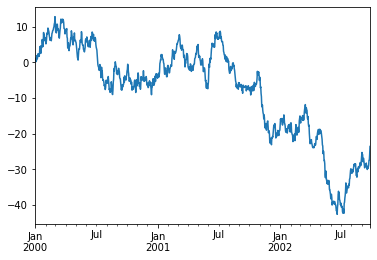

In [64]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

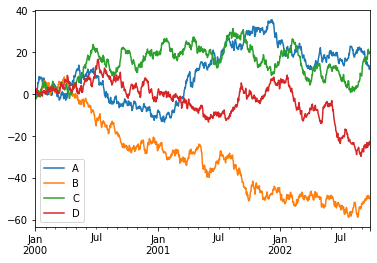

In [71]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
